In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import skimage.color as color
from PIL import Image
import numpy as np
import random

from quantization_student import quantizeRGB, computeQuantizationError, quantizeHSV

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
im = Image.open('data/fish.jpg')
im = np.asarray(im, dtype = np.double)
im.shape

(326, 500, 3)

In [3]:
def test_computeQuantizationError():
    np.random.seed(1)
    arr1 = 255*np.random.random((10, 10, 3))
    arr2 = 255*np.random.random((10, 10, 3))
        
    return computeQuantizationError(arr1, arr2)

res = test_computeQuantizationError()
if(np.isclose(res, 3349376.0074751126)):
    print("Unit test for computeQuantizationError() passes")

Unit test for computeQuantizationError() passes


Quantization Error = e^ 14.704810172220883
Unit Test for quantizeRGB() passes


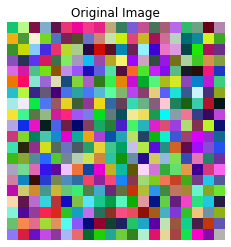

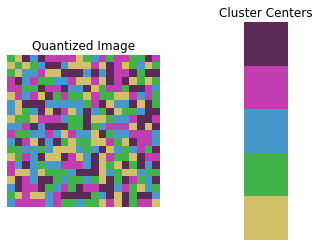

In [15]:
def test_quantizeRGB():
    np.random.seed(7)
    k = 5
    img = np.array(255*np.random.random((20,20,3)), dtype=int)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    
    quantized_img, cluster_center = quantizeRGB(img, k)
    
    fig, axis = plt.subplots(nrows=1, ncols=2)
    axis[0].axis('off')
    axis[0].imshow(np.array(quantized_img, dtype=int))
    axis[0].set_title("Quantized Image")
    
    axis[1].axis('off')
    axis[1].imshow(np.array(cluster_center[:, np.newaxis, :], dtype=int))
    axis[1].set_title("Cluster Centers")
    
    log_err = np.log(computeQuantizationError(img, quantized_img))
    print("Quantization Error = e^", log_err)
    return log_err

if(np.isclose(test_quantizeRGB(), 14.704940959444585, atol=1e-5, rtol=1e-3)):
    print("Unit Test for quantizeRGB() passes")

Quantization Error = e^ 13.514133117537886
Unit test for quantizeHSV() passes


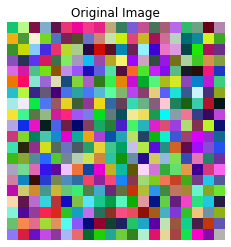

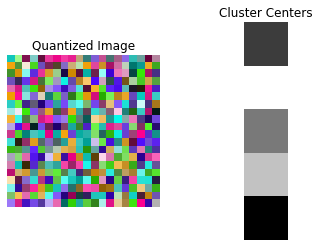

In [16]:
def test_quantizeHSV():
    np.random.seed(7)
    k = 5
    img = np.array(255*np.random.random((20,20,3)), dtype=int)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    
    quantized_img, cluster_center = quantizeHSV(img, k)
    
    fig, axis = plt.subplots(nrows=1, ncols=2)
    axis[0].axis('off')
    axis[0].imshow(np.array(quantized_img, dtype=int))
    axis[0].set_title("Quantized Image")
    
    axis[1].axis('off')
    axis[1].imshow(cluster_center, cmap='gray')
    axis[1].set_title("Cluster Centers")
    
    log_err = np.log(computeQuantizationError(img, quantized_img))
    print("Quantization Error = e^", log_err)
    
    return log_err

if(np.isclose(test_quantizeHSV(), 13.514133117537886, atol=1e-5, rtol=1e-3)):
    print("Unit test for quantizeHSV() passes")

In [6]:
def run_quantization(im, n_k, color_space='RGB'):
    ''' Performs color quantization on the input image for all 
    the input number of clusters, assuming the input colorspace.

    Args:
        im: Input image, assumed to be an ndarray.
        n_k: list of cluster centers to perform quantization on.
        color_space: used to decide which function to call.

    Returns:
        quantized_imgs: list of quantized images
        cluster_centers: list of cluster centers of the generated 
                         clusters at each k. 
        quantization_errors: computed quantization error between 
                             the generated image and original image.
    '''
    quantized_imgs = []
    cluster_centers = []
    quantization_errors = []
    
    for k in n_k:
        if(color_space == 'RGB' or color_space == 'rgb'):
            quantized_img, cluster_center = quantizeRGB(im, k)
        elif(color_space == 'HSV' or color_space == 'hsv'):
            quantized_img, cluster_center = quantizeHSV(im, k)
        else:
            print("Error: Enter either \'RGB\' or \'HSV\' as a colorspace")
            return
            
        quantized_imgs.append(quantized_img)
        cluster_centers.append(cluster_center)
        quantization_errors.append(
            np.log(computeQuantizationError(im, quantized_img))
        )
    
    nrows = int(np.ceil(len(n_k)/2))
    ncols = 2
    fig,axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(nrows*10,20))

    for ax in axes.flatten():
        ax.axis('off')

    for i, k in enumerate(n_k):
        title = 'K = '+str(k)+", err = e^("+str(quantization_errors[i]) + ")"
        
        if(nrows > 1):
            axes[i//ncols, i%ncols].imshow(np.asarray(quantized_imgs[i], dtype=int))
            axes[i//ncols, i%ncols].set_title(title)
        else:
            axes[i].imshow(np.asarray(quantized_imgs[i], dtype=int))
            axes[i].set_title(title)

    plt.show()     
        

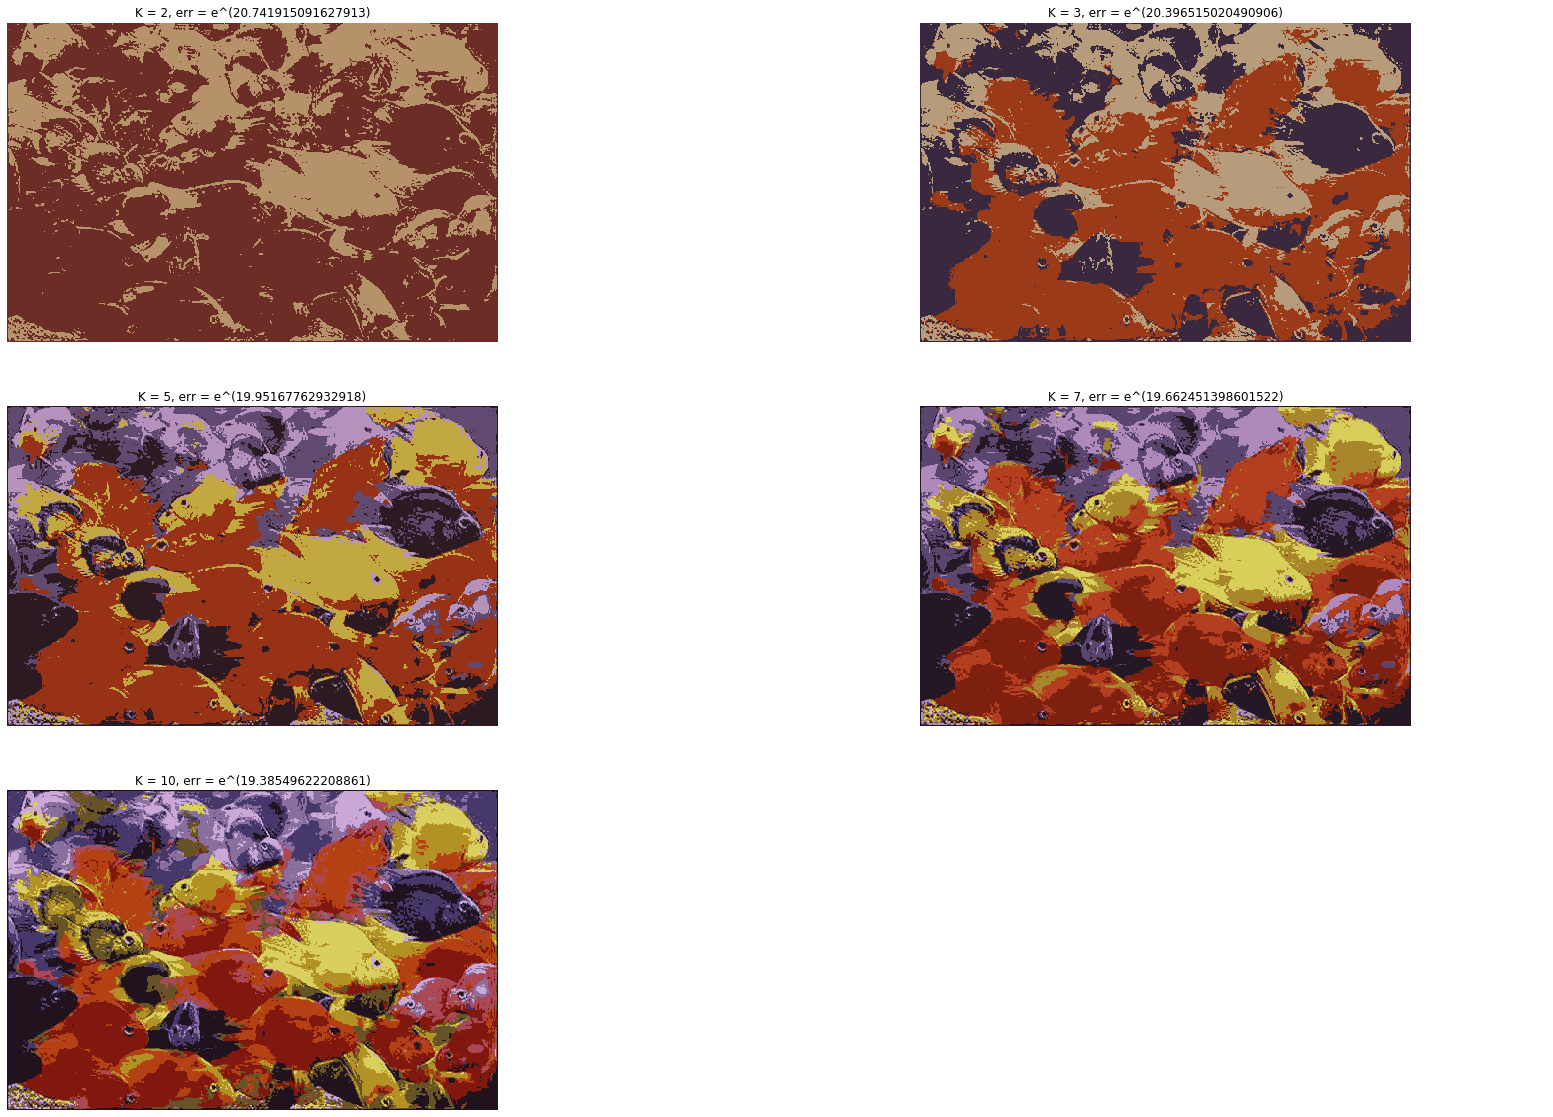

In [13]:
run_quantization(im, n_k = [2, 3, 5, 7, 10], color_space='RGB')

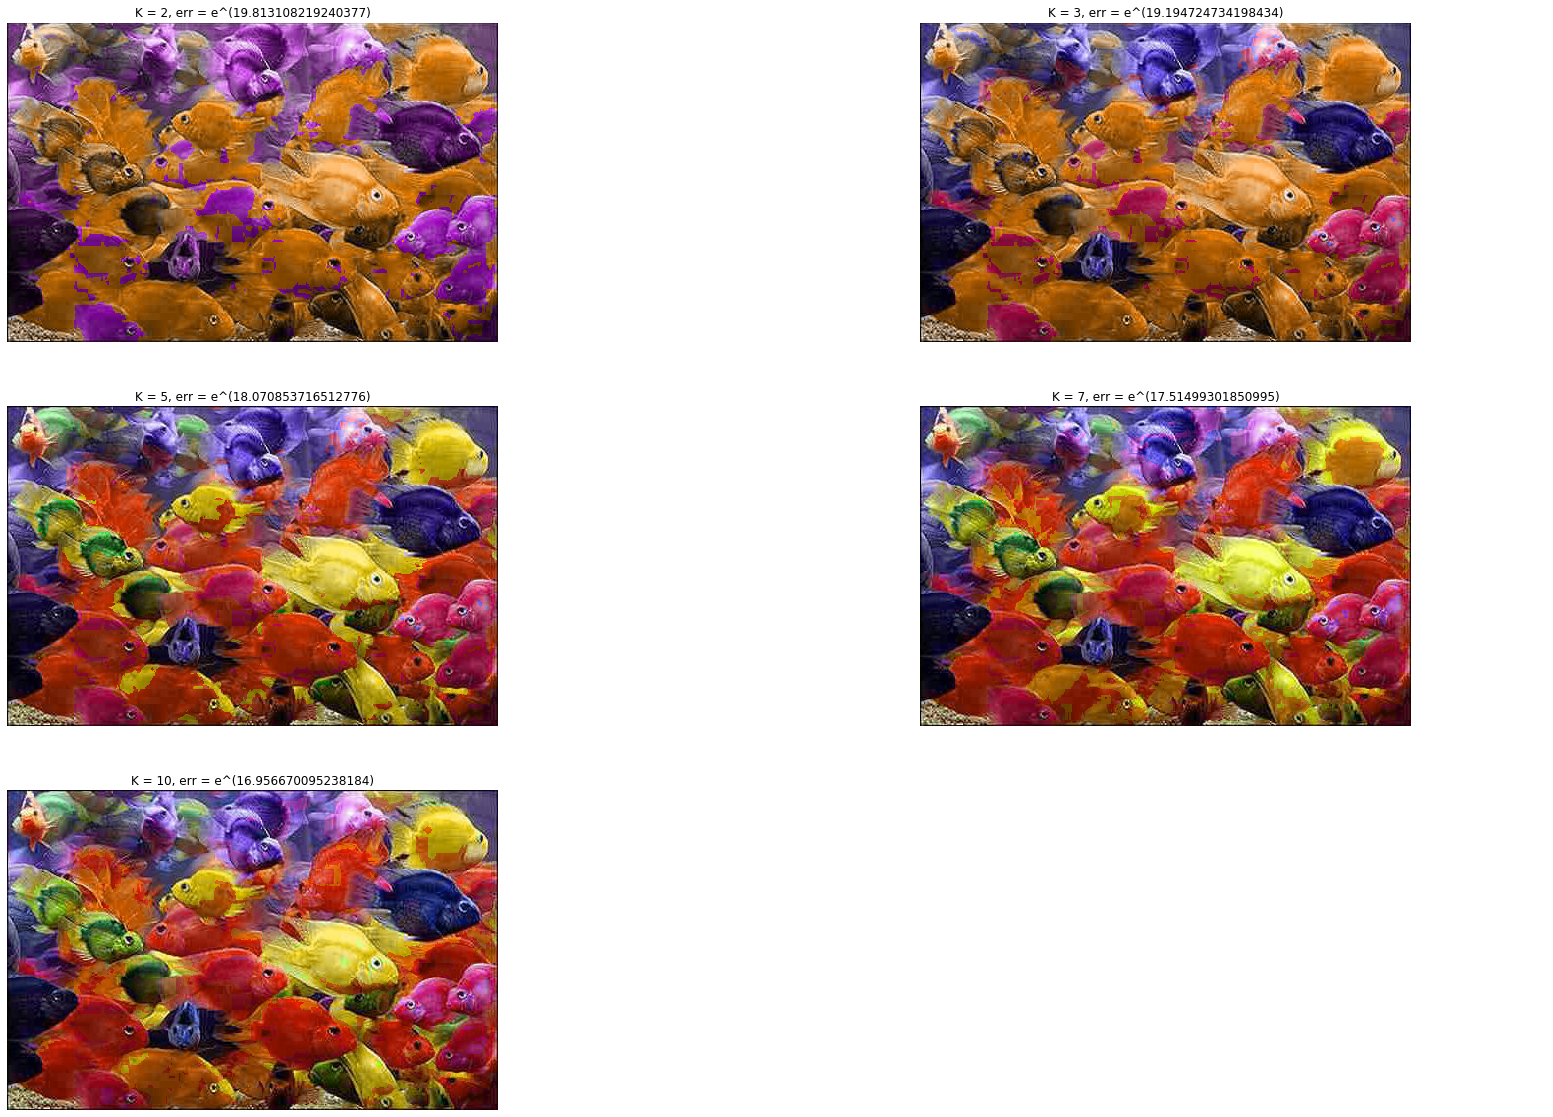

In [17]:
run_quantization(im, n_k = [2, 3, 5, 7, 10], color_space='HSV')